## 피버팅으로 데이터 나열 방식 바꾸기

In [16]:
import pandas as pd
import numpy as np

data = pd.read_csv('csv/macrodata.csv')

In [17]:
data

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [18]:
periods = pd.PeriodIndex(year=data.year, quarter=data.quarter, name='date')
periods

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', name='date', length=203)

In [4]:
s1 = pd.Series(data=[1,2,1,1])
s1

0    1
1    2
2    1
3    1
dtype: int64

In [5]:
s2 = pd.Series([1,0,0,1])
s2

0    1
1    0
2    0
3    1
dtype: int64

In [19]:
data = pd.DataFrame(data.to_records(), columns=pd.Index(['realdpi', 'infl', 'unemp'], name='item'), index=periods.to_timestamp('D','end'))
ldata = data.stack().reset_index().rename(columns={0:'value'})
ldata

,date,item,value
0,1959-03-31 23:59:59.999999999,realdpi,1886.90
1,1959-03-31 23:59:59.999999999,infl,0.00
2,1959-03-31 23:59:59.999999999,unemp,5.80
3,1959-06-30 23:59:59.999999999,realdpi,1919.70
4,1959-06-30 23:59:59.999999999,infl,2.34
...,...,...,...
604,2009-06-30 23:59:59.999999999,infl,3.37
605,2009-06-30 23:59:59.999999999,unemp,9.20
606,2009-09-30 23:59:59.999999999,realdpi,10040.60
607,2009-09-30 23:59:59.999999999,infl,3.56


In [20]:
pivoted = ldata.pivot('date','item','value')
pivoted.head()

item,infl,realdpi,unemp
date,,,
1959-03-31 23:59:59.999999999,0.00,1886.9,5.8
1959-06-30 23:59:59.999999999,2.34,1919.7,5.1
1959-09-30 23:59:59.999999999,2.74,1916.4,5.3
1959-12-31 23:59:59.999999999,0.27,1931.3,5.6
1960-03-31 23:59:59.999999999,2.31,1955.5,5.2


In [21]:
ldata['value2'] = np.random.randn(len(ldata))
ldata.head()

,date,item,value,value2
0,1959-03-31 23:59:59.999999999,realdpi,1886.90,-1.054764
1,1959-03-31 23:59:59.999999999,infl,0.00,0.407771
2,1959-03-31 23:59:59.999999999,unemp,5.80,-1.362159
3,1959-06-30 23:59:59.999999999,realdpi,1919.70,0.703001
4,1959-06-30 23:59:59.999999999,infl,2.34,-0.283705


In [22]:
pivoted = ldata.pivot('date','item')
pivoted[:5]

value                  value2            \
item                           infl realdpi unemp      infl   realdpi   
date                                                                    
1959-03-31 23:59:59.999999999  0.00  1886.9   5.8  0.407771 -1.054764   
1959-06-30 23:59:59.999999999  2.34  1919.7   5.1 -0.283705  0.703001   
1959-09-30 23:59:59.999999999  2.74  1916.4   5.3 -0.435713 -0.056304   
1959-12-31 23:59:59.999999999  0.27  1931.3   5.6 -1.313181 -1.521370   
1960-03-31 23:59:59.999999999  2.31  1955.5   5.2 -1.230725 -1.172999   

                                         
item                              unemp  
date                                     
1959-03-31 23:59:59.999999999 -1.362159  
1959-06-30 23:59:59.999999999 -1.234029  
1959-09-30 23:59:59.999999999 -0.763877  
1959-12-31 23:59:59.999999999  1.226597  
1960-03-31 23:59:59.999999999 -1.160924

## 데이터의 변형 - 중복제거

In [24]:
d = pd.DataFrame({'k1':['one']*3 +['two']*4,
              'k2':[1,1,2,3,3,4,4]})
d

,k1,k2
0,one,1
1,one,1
2,one,2
3,two,3
4,two,3
5,two,4
6,two,4


In [25]:
d.duplicated()

0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool

In [26]:
d.drop_duplicates()

,k1,k2
0,one,1
2,one,2
3,two,3
5,two,4


In [27]:
d['v1'] = range(7)

In [28]:
d

,k1,k2,v1
0,one,1,0
1,one,1,1
2,one,2,2
3,two,3,3
4,two,3,4
5,two,4,5
6,two,4,6


In [29]:
d.drop_duplicates()

,k1,k2,v1
0,one,1,0
1,one,1,1
2,one,2,2
3,two,3,3
4,two,3,4
5,two,4,5
6,two,4,6


In [30]:
d.drop_duplicates(['k1'])

,k1,k2,v1
0,one,1,0
3,two,3,3


## replace

In [31]:
s1 = pd.Series([1,2,3,4,5,1,1,0])
s1

0    1
1    2
2    3
3    4
4    5
5    1
6    1
7    0
dtype: int64

In [35]:
s1.replace(1, np.nan)

0    NaN
1    2.0
2    3.0
3    4.0
4    5.0
5    NaN
6    NaN
7    0.0
dtype: float64

## 축 색인 변경

In [43]:
data = pd.DataFrame(np.arange(12).reshape(3,4),
                   index=['Ohio','Seoul','New york',],
                   columns=[1,2,3,4])
data

,1,2,3,4
Ohio,0,1,2,3
Seoul,4,5,6,7
New york,8,9,10,11


In [55]:
data.index = data.index.map(str.upper)

In [50]:
data.index.map(str.lower)

Index(['ohio', 'seoul', 'new york'], dtype='object')

In [56]:
data

,1,2,3,4
OHIO,0,1,2,3
SEOUL,4,5,6,7
NEW YORK,8,9,10,11


In [58]:
data.rename(index=str.lower)

,1,2,3,4
ohio,0,1,2,3
seoul,4,5,6,7
new york,8,9,10,11


In [60]:
val = 'a,b,   guido'
val

'a,b,   guido'

In [64]:
val.split(',')

['a', 'b', '   guido']

In [66]:
pieces = [x.strip() for x in val.split(',')]
pieces

['a', 'b', 'guido']

In [70]:
val.strip(',')

'a,b,   guido'

In [71]:
'::'.join(pieces)

'a::b::guido'

In [72]:
'guido' in val

True

# 정규표현식


In [73]:
import re

text='foo    bar\t baz  \tqux'

In [77]:
re.split('\s+',text)

['foo', 'bar', 'baz', 'qux']

In [78]:
data = {"Dave":'dave@google.com', 'Steve':'steve@gmail.com', 'Rob':'rob@gmail.com', 'Wes':np.nan}
data

{'Dave': 'dave@google.com',
 'Steve': 'steve@gmail.com',
 'Rob': 'rob@gmail.com',
 'Wes': nan}

In [80]:
type(data)

dict

In [82]:
data = pd.Series(data)

In [83]:
data

Dave     dave@google.com
Steve    steve@gmail.com
Rob        rob@gmail.com
Wes                  NaN
dtype: object

In [84]:
data.isnull()

Dave     False
Steve    False
Rob      False
Wes       True
dtype: bool

In [87]:
data.str.contains('gmail.com')

Dave     False
Steve     True
Rob       True
Wes        NaN
dtype: object

In [93]:
data.str[:2]

Dave      da
Steve     st
Rob       ro
Wes      NaN
dtype: object

In [95]:
data.index[:]

Index(['Dave', 'Steve', 'Rob', 'Wes'], dtype='object')

## USda_Food 예제

In [96]:
import json
db = json.load(open('csv/database.json'))
len(db)

6636

In [100]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [102]:
db[0]['nutrients'][0]

{'value': 25.18,
 'units': 'g',
 'description': 'Protein',
 'group': 'Composition'}

In [105]:
nutrients = pd.DataFrame(db[0]['nutrients'])

In [107]:
nutrients[:7]

,value,units,description,group
0,25.18,g,Protein,Composition
1,29.20,g,Total lipid (fat),Composition
2,3.06,g,"Carbohydrate, by difference",Composition
3,3.28,g,Ash,Other
4,376.00,kcal,Energy,Energy
5,39.28,g,Water,Composition
6,1573.00,kJ,Energy,Energy


In [111]:
info_index = ['description', 'group', 'id', 'manufacturer']
info = pd.DataFrame(db, columns=info_index)
info[:]

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,
...,...,...,...,...
6631,"Bologna, beef, low fat",Sausages and Luncheon Meats,42161,
6632,"Turkey and pork sausage, fresh, bulk, patty or...",Sausages and Luncheon Meats,42173,
6633,"Babyfood, juice, pear",Baby Foods,43408,None
6634,"Babyfood, dessert, banana yogurt, strained",Baby Foods,43539,None


In [112]:
info.info

<bound method DataFrame.info of                                             description  \
0                                       Cheese, caraway   
1                                       Cheese, cheddar   
2                                          Cheese, edam   
3                                          Cheese, feta   
4                    Cheese, mozzarella, part skim milk   
...                                                 ...   
6631                             Bologna, beef, low fat   
6632  Turkey and pork sausage, fresh, bulk, patty or...   
6633                              Babyfood, juice, pear   
6634         Babyfood, dessert, banana yogurt, strained   
6635              Babyfood, banana no tapioca, strained   

                            group     id manufacturer  
0          Dairy and Egg Products   1008               
1          Dairy and Egg Products   1009               
2          Dairy and Egg Products   1018               
3          Dairy and Egg Products  

In [114]:
pd.value_counts(info.group)[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Name: group, dtype: int64

In [116]:
nutrients = []

for d in db:
    fnuts = pd.DataFrame(d['nutrients'])
    fnuts['id'] = d['id']
    nutrients.append(fnuts)

nutrients = pd.concat(nutrients, ignore_index = True)

In [117]:
nutrients

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [119]:
nutrients.duplicated().sum() # true (중복값) 14179개 존재

14179

In [121]:
nutrients = nutrients.drop_duplicates()
nutrients

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [124]:
col_mapping = {'description': 'food',
              'group': 'fgroup'}

info = info.rename(columns=col_mapping, copy=False)
info.info

<bound method DataFrame.info of                                                    food  \
0                                       Cheese, caraway   
1                                       Cheese, cheddar   
2                                          Cheese, edam   
3                                          Cheese, feta   
4                    Cheese, mozzarella, part skim milk   
...                                                 ...   
6631                             Bologna, beef, low fat   
6632  Turkey and pork sausage, fresh, bulk, patty or...   
6633                              Babyfood, juice, pear   
6634         Babyfood, dessert, banana yogurt, strained   
6635              Babyfood, banana no tapioca, strained   

                           fgroup     id manufacturer  
0          Dairy and Egg Products   1008               
1          Dairy and Egg Products   1009               
2          Dairy and Egg Products   1018               
3          Dairy and Egg Products  

In [125]:
col_mapping = {'description': 'nutrients',
              'group': 'nutgroup'}
nutrients = nutrients.rename(columns=col_mapping, copy=False)
nutrients

,value,units,nutrients,nutgroup,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [136]:
ndata = pd.merge(nutrients, info, on='id', how='outer') # id를 기준으로 nutrients 와 info dataframe 병합

In [137]:
ndata

,value,units,nutrients,nutgroup,id,food,fgroup,manufacturer
0,25.180,g,Protein,Composition,1008,"Cheese, caraway",Dairy and Egg Products,
1,29.200,g,Total lipid (fat),Composition,1008,"Cheese, caraway",Dairy and Egg Products,
2,3.060,g,"Carbohydrate, by difference",Composition,1008,"Cheese, caraway",Dairy and Egg Products,
3,3.280,g,Ash,Other,1008,"Cheese, caraway",Dairy and Egg Products,
4,376.000,kcal,Energy,Energy,1008,"Cheese, caraway",Dairy and Egg Products,
...,...,...,...,...,...,...,...,...
375171,0.000,mcg,"Vitamin B-12, added",Vitamins,43546,"Babyfood, banana no tapioca, strained",Baby Foods,None
375172,0.000,mg,Cholesterol,Other,43546,"Babyfood, banana no tapioca, strained",Baby Foods,None
375173,0.072,g,"Fatty acids, total saturated",Other,43546,"Babyfood, banana no tapioca, strained",Baby Foods,None
375174,0.028,g,"Fatty acids, total monounsaturated",Other,43546,"Babyfood, banana no tapioca, strained",Baby Foods,None


In [138]:
ndata.iloc[30000]

value                                             0.04
units                                                g
nutrients                                      Glycine
nutgroup                                   Amino Acids
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

In [140]:
result = ndata.groupby(['nutrients', 'fgroup'])['value'].quantile(0.5)
result

nutrients         fgroup                           
Adjusted Protein  Sweets                               12.900
                  Vegetables and Vegetable Products     2.180
Alanine           Baby Foods                            0.085
                  Baked Products                        0.248
                  Beef Products                         1.550
                                                        ...  
Zinc, Zn          Snacks                                1.470
                  Soups, Sauces, and Gravies            0.200
                  Spices and Herbs                      2.750
                  Sweets                                0.360
                  Vegetables and Vegetable Products     0.330
Name: value, Length: 2246, dtype: float64

<AxesSubplot:ylabel='fgroup'>

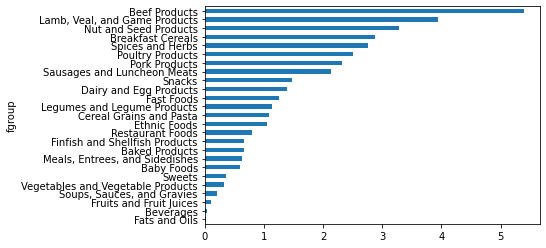

In [143]:
result['Zinc, Zn'].sort_values().plot(kind='barh')

# matplotlib API

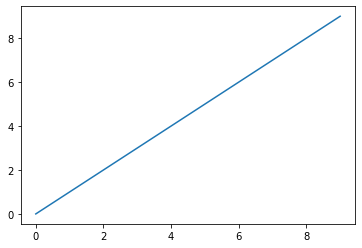

In [147]:
import matplotlib.pyplot as plt
plt.plot(np.arange(10))

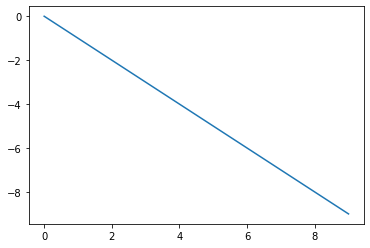

In [151]:
plt.plot(np.arange(10)*-1)

In [155]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [156]:
plt.gcf() # 현재 활성화된 figure 참조

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [157]:
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

In [158]:
plt.gcf() # 현재 활성화된 figure 참조

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

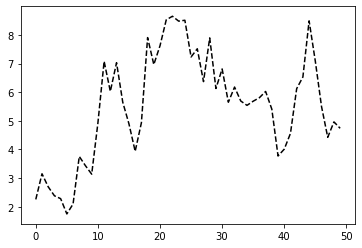

In [170]:
plt.plot(np.random.randn(50).cumsum(), 'k--') # 해석 : randn(50)의 누산을 그래프로 그린다. k : 검정 선, -- : 점선

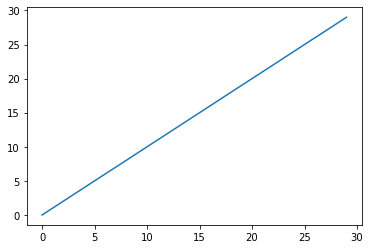

In [174]:
plt.plot(np.arange(30))

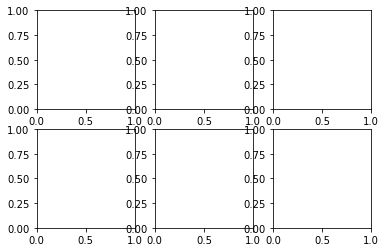

In [175]:
fig, axes = plt.subplots(2,3)

In [176]:
axes

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

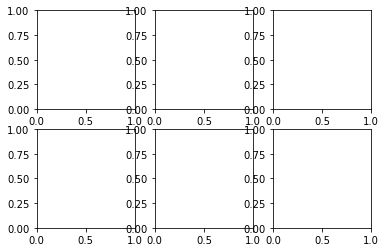

In [177]:
fig

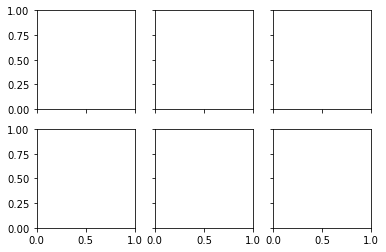

In [183]:
a = plt.subplots(2,3, sharex=True, sharey=True)

In [208]:
a[0].subplots_adjust(wspace=0, hspace=0)

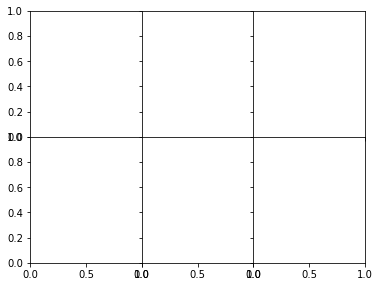

In [209]:
a[0]

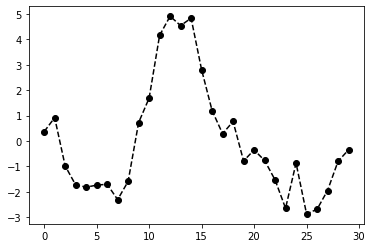

In [218]:
plt.plot(np.random.randn(30).cumsum(), 'ko--')

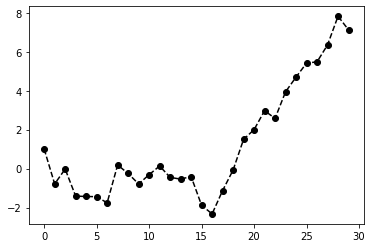

In [223]:
plt.plot(np.random.randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

In [224]:
plot_data = np.random.randn(30).cumsum()

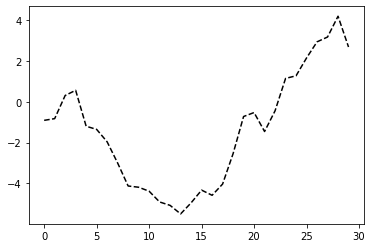

In [227]:
plt.plot(plot_data, 'k--', label='Default')

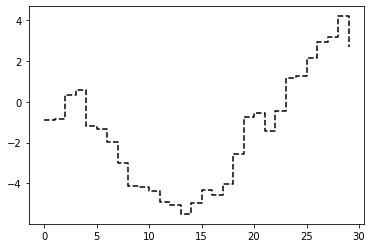

In [230]:
plt.plot(plot_data, 'k--', drawstyle='steps-post', label='steps-post')

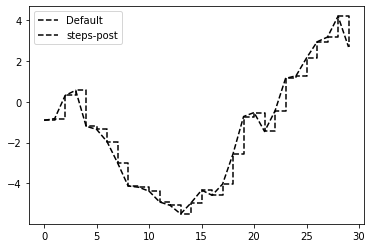

In [234]:
plt.plot(plot_data, 'k--', label='Default')
plt.plot(plot_data, 'k--', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

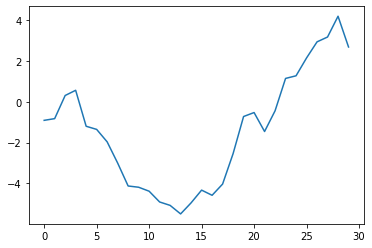

In [241]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.plot(plot_data)

Text(0.5, 0, 'X - axis')

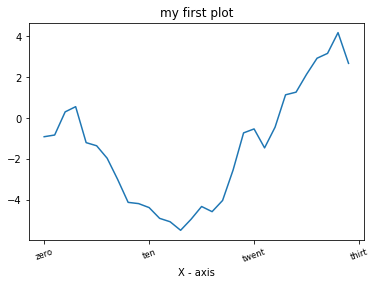

In [249]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.plot(plot_data)
ticks = ax.set_xticks([0,10,20,30])
labels = ax.set_xticklabels(['zero','ten', 'twent','thirt'], rotation=20, fontsize='small')
ax.set_title("my first plot")
ax.set_xlabel('X - axis')

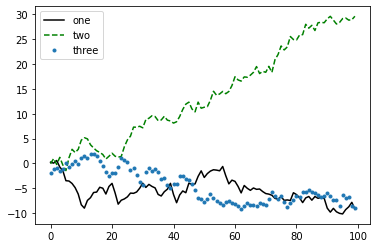

In [251]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 

ax.plot(np.random.randn(100).cumsum(), 'k', label='one')
ax.plot(np.random.randn(100).cumsum(), 'g--', label='two')
ax.plot(np.random.randn(100).cumsum(), '.', label='three')

ax.legend()

## pandas 에서 plot 사용하기

<AxesSubplot:>

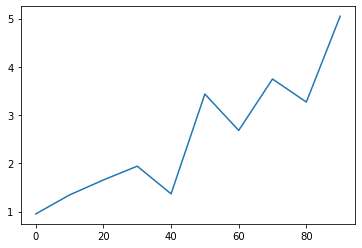

In [257]:
s1 = pd.Series(np.random.randn(10).cumsum(), index = np.arange(0,100,10))
s1.plot()

<AxesSubplot:>

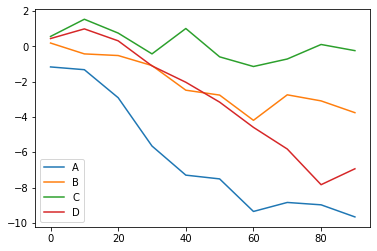

In [255]:
df = pd.DataFrame(np.random.randn(10,4).cumsum(0), columns=['A','B','C','D'], index=np.arange(0,100,10))
df.plot()

<AxesSubplot:>

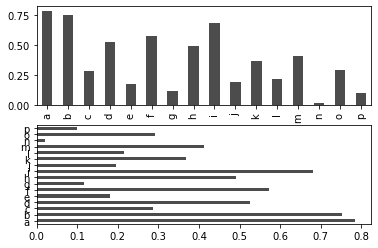

In [259]:
fig, axes = plt.subplots(2,1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot( kind='bar', ax=axes[0], color='k', alpha=0.7) # 수직bar 수평barh
data.plot( kind='barh', ax=axes[1], color='k', alpha=0.7)

<AxesSubplot:>

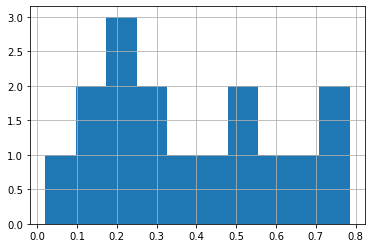

In [267]:
data.hist(bins=10)

<AxesSubplot:ylabel='Density'>

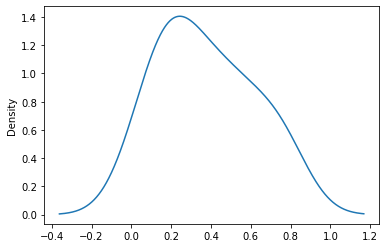

In [265]:
data.plot(kind='kde')

<AxesSubplot:>

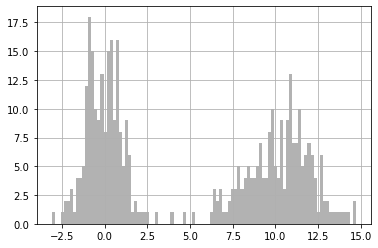

In [292]:
comp1 = np.random.normal(0,1, size=200) 
comp2 = np.random.normal(10,2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
values.hist(bins=100, alpha=0.3, color='k')

## groupby

In [294]:
df = pd.DataFrame({'key1':['a','a','b','b','a'],
                   'key2':['one','two','one','two','one'],
                   'data1': np.random.randn(5),
                   'data2': np.random.randn(5),
                  })
df

,key1,key2,data1,data2
0,a,one,0.401986,0.058900
1,a,two,0.671025,2.117258
2,b,one,1.793213,-0.497931
3,b,two,0.369210,-1.145929
4,a,one,0.368809,0.079679


In [295]:
grouped = df['data1'].groupby(df['key1'])
grouped

In [296]:
grouped.mean()

key1
a    0.480607
b    1.081212
Name: data1, dtype: float64

In [298]:
means = df['data1'].groupby([df['key1'],df['key2']]).mean()
means

key1  key2
a     one     0.385398
      two     0.671025
b     one     1.793213
      two     0.369210
Name: data1, dtype: float64

In [299]:
means.unstack()

key2,one,two
key1,,
a,0.385398,0.671025
b,1.793213,0.369210


In [304]:
df.dtypes

key1      object
key2      object
data1    float64
data2    float64
dtype: object

In [305]:
grouped = df.groupby(df.dtypes, axis=1) # df.dtypes을 기준으로 grouping, 축은 col
grouped

In [307]:
dict(list(grouped))

{dtype('float64'):       data1     data2
 0  0.401986  0.058900
 1  0.671025  2.117258
 2  1.793213 -0.497931
 3  0.369210 -1.145929
 4  0.368809  0.079679,
 dtype('O'):   key1 key2
 0    a  one
 1    a  two
 2    b  one
 3    b  two
 4    a  one}

In [317]:
people = pd.DataFrame(np.random.randn(5,5),
                  columns=['a','b','c','d','e'],
                  index=['Joe','Steve','Wes','Jim','Travis'])
people

,a,b,c,d,e
Joe,-1.438164,-0.594299,0.935688,0.025997,0.353471
Steve,-0.037714,0.929781,-0.379825,-0.908685,-0.178222
Wes,-1.322518,-0.079849,1.151461,0.746023,-1.118076
Jim,-0.105949,0.042855,-0.468157,1.450388,0.515142
Travis,-1.272830,-1.488326,0.882600,0.283690,0.346290
